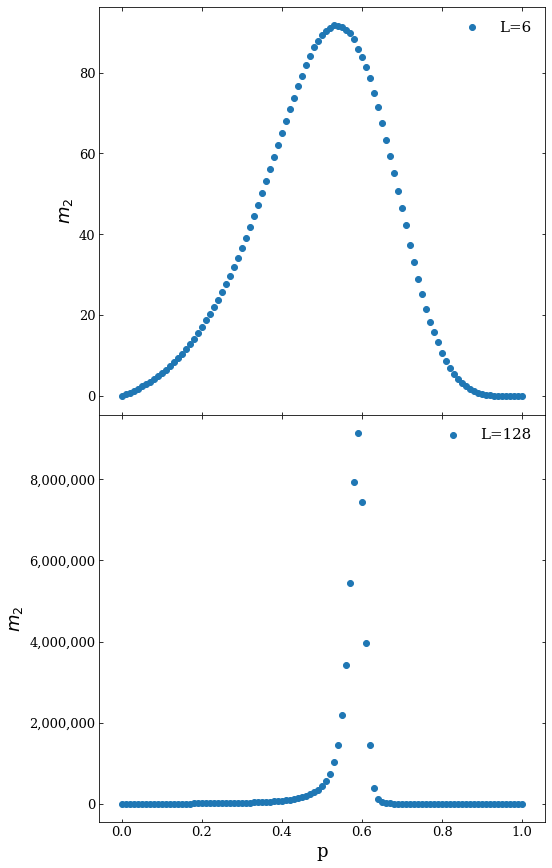

In [38]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii
import matplotlib.colors as colors
from matplotlib import *
import sys
from pylab import *
from matplotlib.colors import LogNorm
import scipy.integrate as integrate
import scipy
import pymc
from astropy.io import fits
import math
import os,glob
import matplotlib.patches as mpatches
from scipy.interpolate import splrep, splev
import numpy.polynomial.polynomial as poly

pc=0.592
sigma=2.05
mylist11 = []
mylist12 = []

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.size'] = 13
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
#mpl.rcParams['axes.labelsize'] = 18

fig = plt.figure(figsize=(8,15)) # Notice the equal aspect ratio


# equivalent but more general
ax1=plt.subplot(2,1, 1)#, gridspec_kw={"width_ratios":1})
ax2=plt.subplot(2,1, 2)#, gridspec_kw={"width_ratios":1}) 


fig.subplots_adjust(wspace=0, hspace=0)
#ax1.set_xlim(0.05,1.)
#ax1.set_ylim(2.2,2.6)
#ax2.set_xlim(0.05,1.)
#ax2.set_ylim(-0.1,100000)
ax1.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax2.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax2.set_ylabel(r'$m_{2}$',fontsize=18)
ax1.set_ylabel(r'$m_{2}$',fontsize=18)
ax2.set_xlabel('p',fontsize=18)


dir_name='/home/pedro/Escritorio/Fisica-Computacional-master/Corridas/'
base_filename='Problema6L_6'


filename =  os.path.join(dir_name, base_filename + "." + 'dat')
data = pd.read_table(filename, header=None, sep="\s+")
p_6=data.iloc[:,0]
m2_6=data.iloc[:,1]
max6= max(m2_6)

base_filename='Problema6L_128'


filename =  os.path.join(dir_name, base_filename + "." + 'dat')
data = pd.read_table(filename, header=None, sep="\s+")
p_128=data.iloc[:,0]
m2_128=data.iloc[:,1]
max128= max(m2_6)


ax1.scatter(p_6,m2_6,label='L=6')
ax2.scatter(p_128,m2_128,label='L=128')

#plt.plot(x_new,ffit, linewidth=5,color='k', label=r'$\gamma = %.2f$' %(coefs[1]))
ax1.legend(fontsize=15.,frameon=False)
ax2.legend(fontsize=15.,frameon=False)
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))



plt.savefig('/home/pedro/Escritorio/Problema6.pdf', bbox_inches='tight', rasterized=True, dpi=300) 




/home/pedro/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in log
/home/pedro/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:128: RuntimeWarning: divide by zero encountered in log


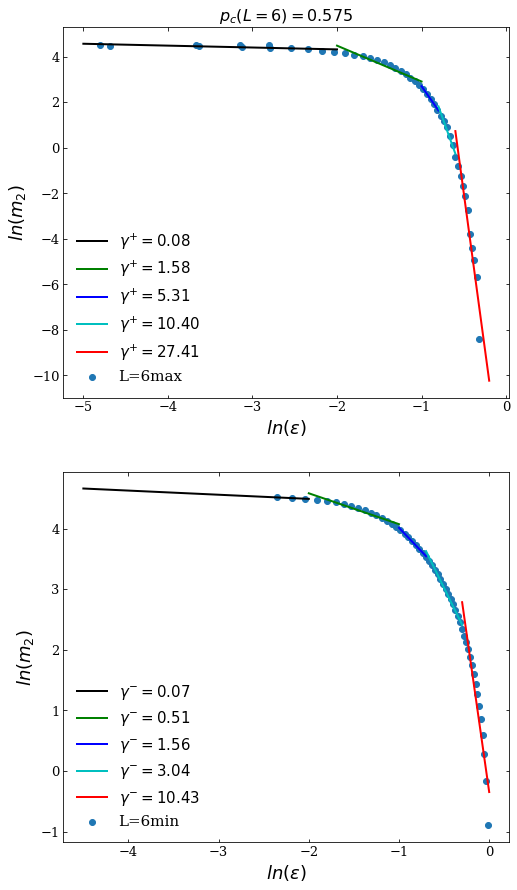

In [43]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii
import matplotlib.colors as colors
from matplotlib import *
import sys
from pylab import *
from matplotlib.colors import LogNorm
import scipy.integrate as integrate
import scipy
import pymc
from astropy.io import fits
import math
import os,glob
import matplotlib.patches as mpatches
from scipy.interpolate import splrep, splev
import numpy.polynomial.polynomial as poly

pc=0.574717 
sigma=2.05
mylist11 = []
mylist12 = []

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.size'] = 13
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
#mpl.rcParams['axes.labelsize'] = 18

fig = plt.figure(figsize=(8,15)) # Notice the equal aspect ratio


# equivalent but more general
ax1=plt.subplot(2,1, 1)#, gridspec_kw={"width_ratios":1})
ax2=plt.subplot(2,1, 2)#, gridspec_kw={"width_ratios":1}) 


fig.subplots_adjust(wspace=0, hspace=0.2)
#ax1.set_xlim(0.05,1.)
#ax1.set_ylim(2.2,2.6)
#ax2.set_xlim(0.05,1.)
#ax2.set_ylim(-0.1,100000)
ax1.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax2.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax2.set_ylabel(r'$ln(m_{2})$',fontsize=18)
ax1.set_ylabel(r'$ln(m_{2})$',fontsize=18)
ax1.set_xlabel(r'$ln(\epsilon)$',fontsize=18)
ax2.set_xlabel(r'$ln(\epsilon)$',fontsize=18)


dir_name='/home/pedro/Escritorio/Fisica-Computacional-master/Corridas/'
base_filename='Problema6L_6'


filename =  os.path.join(dir_name, base_filename + "." + 'dat')
data = pd.read_table(filename, header=None, sep="\s+")
p_6=data.iloc[:,0]
m2_6=data.iloc[:,1]

x=p_6
y=m2_6

minpos =data.iloc[:,1].idxmax() 

cond = (x>p_6[minpos]) 
p_6max = x[ cond ]
m2_6max = y[ cond ]

e_max=np.log(np.absolute(p_6max-pc)/pc)
m2_6maxlog=np.log(m2_6max)

cond = (e_max>-5.) & (e_max<-2.)
xFit = e_max[ cond ]
yFit = m2_6maxlog[ cond ]

x_new_max_43 = np.linspace(-5,-2., num=len(xFit)*10)
coefs_max_43 = poly.polyfit(xFit,yFit , 1)
ffit_max_43 = poly.polyval(x_new_max_43, coefs_max_43)
axes = plt.gca()

cond = (e_max>-2.) & (e_max<-1.)
xFit = e_max[ cond ]
yFit = m2_6maxlog[ cond ]

x_new_max_32 = np.linspace(-2.,-1., num=len(xFit)*10)
coefs_max_32 = poly.polyfit(xFit,yFit , 1)
ffit_max_32 = poly.polyval(x_new_max_32, coefs_max_32)
axes = plt.gca()

cond = (e_max>-1.) & (e_max<-0.8)
xFit = e_max[ cond ]
yFit = m2_6maxlog[ cond ]

x_new_max_21 = np.linspace(-1.,-0.8, num=len(xFit)*10)
coefs_max_21 = poly.polyfit(xFit,yFit , 1)
ffit_max_21 = poly.polyval(x_new_max_21, coefs_max_21)
axes = plt.gca()

cond = (e_max>-0.8) & (e_max<-0.6)
xFit = e_max[ cond ]
yFit = m2_6maxlog[ cond ]

x_new_max_extra = np.linspace(-0.8,-0.6, num=len(xFit)*10)
coefs_max_extra = poly.polyfit(xFit,yFit , 1)
ffit_max_extra = poly.polyval(x_new_max_extra, coefs_max_extra)
axes = plt.gca()

cond = (e_max>-0.6) & (e_max<-0.2) & (m2_6maxlog>-1000)
xFit = e_max[ cond ]
yFit = m2_6maxlog[ cond ]

x_new_max_10 = np.linspace(-0.6,-0.2, num=len(xFit)*10)
coefs_max_10 = poly.polyfit(xFit,yFit , 1)
ffit_max_10 = poly.polyval(x_new_max_10, coefs_max_10)
axes = plt.gca()


cond = (x<p_6[minpos]) 
p_6min = x[ cond ]
m2_6min = y[ cond ]


e_min=np.log(np.absolute(p_6min-pc)/pc)
m2_6minlog=np.log(m2_6min)

cond = (e_min>-5.) & (e_min<-2.)
xFit = e_min[ cond ]
yFit = m2_6minlog[ cond ]

x_new_min_43 = np.linspace(-4.5,-2., num=len(xFit)*10)
coefs_min_43 = poly.polyfit(xFit,yFit , 1)
ffit_min_43 = poly.polyval(x_new_min_43, coefs_min_43)
axes = plt.gca()

cond = (e_min>-2.) & (e_min<-1.)
xFit = e_min[ cond ]
yFit = m2_6minlog[ cond ]

x_new_min_32 = np.linspace(-2.,-1.0, num=len(xFit)*10)
coefs_min_32 = poly.polyfit(xFit,yFit , 1)
ffit_min_32 = poly.polyval(x_new_min_32, coefs_min_32)
axes = plt.gca()

cond = (e_min>-1.) & (e_min<-0.7)
xFit = e_min[ cond ]
yFit = m2_6minlog[ cond ]

x_new_min_21 = np.linspace(-1.,-0.7, num=len(xFit)*10)
coefs_min_21 = poly.polyfit(xFit,yFit , 1)
ffit_min_21 = poly.polyval(x_new_min_21, coefs_min_21)
axes = plt.gca()


cond = (e_min>-0.7) & (e_min<-0.3)
xFit = e_min[ cond ]
yFit = m2_6minlog[ cond ]

x_new_min_extra = np.linspace(-0.7,-0.3, num=len(xFit)*10)
coefs_min_extra = poly.polyfit(xFit,yFit , 1)
ffit_min_extra = poly.polyval(x_new_min_extra, coefs_min_extra)
axes = plt.gca()

cond = (e_min>-0.3) & (e_min<-0.01)
xFit = e_min[ cond ]
yFit = m2_6minlog[ cond ]

x_new_min_10 = np.linspace(-0.3,0., num=len(xFit)*10)
coefs_min_10 = poly.polyfit(xFit,yFit , 1)
ffit_min_10 = poly.polyval(x_new_min_10, coefs_min_10)
axes = plt.gca()


ax1.scatter(e_max,m2_6maxlog,label='L=6max')
ax1.plot(x_new_max_43,ffit_max_43, linewidth=2,color='k', label=r'$\gamma^{+} = %.2f$' %(np.absolute(coefs_max_43[1])))
ax1.plot(x_new_max_32,ffit_max_32, linewidth=2,color='g', label=r'$\gamma^{+} = %.2f$' %(np.absolute(coefs_max_32[1])))
ax1.plot(x_new_max_21,ffit_max_21, linewidth=2,color='b', label=r'$\gamma^{+} = %.2f$' %(np.absolute(coefs_max_21[1])))
ax1.plot(x_new_max_extra,ffit_max_extra, linewidth=2,color='c', label=r'$\gamma^{+} = %.2f$' %(np.absolute(coefs_max_extra[1])))
ax1.plot(x_new_max_10,ffit_max_10, linewidth=2,color='r', label=r'$\gamma^{+} = %.2f$' %(np.absolute(coefs_max_10[1])))

ax2.scatter(e_min,m2_6minlog,label='L=6min')
ax2.plot(x_new_min_43,ffit_min_43, linewidth=2,color='k', label=r'$\gamma^{-} = %.2f$' %(np.absolute(coefs_min_43[1])))
ax2.plot(x_new_min_32,ffit_min_32, linewidth=2,color='g', label=r'$\gamma^{-} = %.2f$' %(np.absolute(coefs_min_32[1])))
ax2.plot(x_new_min_21,ffit_min_21, linewidth=2,color='b', label=r'$\gamma^{-} = %.2f$' %(np.absolute(coefs_min_21[1])))
ax2.plot(x_new_min_extra,ffit_min_extra, linewidth=2,color='c', label=r'$\gamma^{-} = %.2f$' %(np.absolute(coefs_min_extra[1])))
ax2.plot(x_new_min_10,ffit_min_10, linewidth=2,color='r', label=r'$\gamma^{-} = %.2f$' %(np.absolute(coefs_min_10[1])))

ax1.legend(fontsize=15.,frameon=False)
ax2.legend(fontsize=15.,frameon=False)


ax1.set_title(r'$p_{c}(L=6) = %.3f$' %pc, fontsize=16)

plt.savefig('/home/pedro/Escritorio/Problema6log_6pcL.pdf', bbox_inches='tight', rasterized=True, dpi=300) 




/home/pedro/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in log
/home/pedro/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:119: RuntimeWarning: divide by zero encountered in log


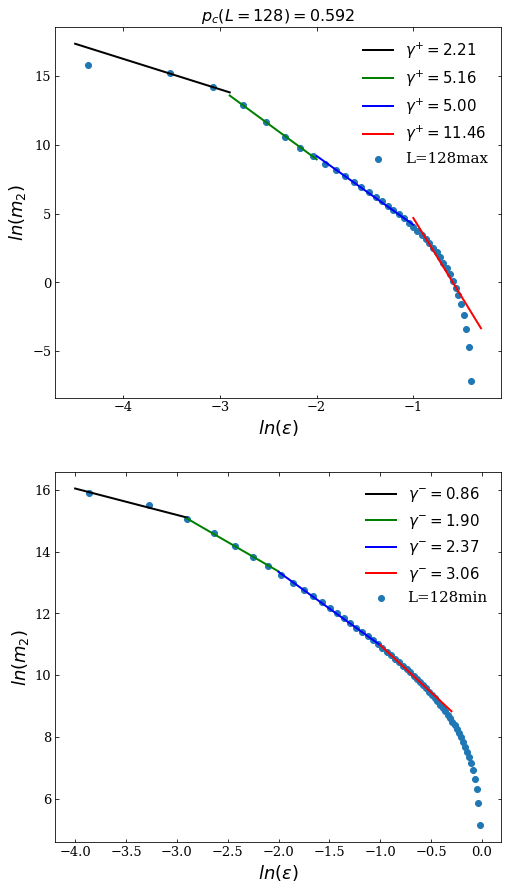

In [44]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii
import matplotlib.colors as colors
from matplotlib import *
import sys
from pylab import *
from matplotlib.colors import LogNorm
import scipy.integrate as integrate
import scipy
import pymc
from astropy.io import fits
import math
import os,glob
import matplotlib.patches as mpatches
from scipy.interpolate import splrep, splev
import numpy.polynomial.polynomial as poly

pc=0.592488
sigma=2.05
mylist11 = []
mylist12 = []

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.size'] = 13
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
#mpl.rcParams['axes.labelsize'] = 18

fig = plt.figure(figsize=(8,15)) # Notice the equal aspect ratio


# equivalent but more general
ax1=plt.subplot(2,1, 1)#, gridspec_kw={"width_ratios":1})
ax2=plt.subplot(2,1, 2)#, gridspec_kw={"width_ratios":1}) 


fig.subplots_adjust(wspace=0, hspace=0.2)
#ax1.set_xlim(0.05,1.)
#ax1.set_ylim(2.2,2.6)
#ax2.set_xlim(0.05,1.)
#ax2.set_ylim(-0.1,100000)
ax1.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax2.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax2.set_ylabel(r'$ln(m_{2})$',fontsize=18)
ax1.set_ylabel(r'$ln(m_{2})$',fontsize=18)
ax2.set_xlabel(r'$ln(\epsilon)$',fontsize=18)
ax1.set_xlabel(r'$ln(\epsilon)$',fontsize=18)


base_filename='Problema6L_128'


filename =  os.path.join(dir_name, base_filename + "." + 'dat')
data = pd.read_table(filename, header=None, sep="\s+")
p_128=data.iloc[:,0] 
m2_128=data.iloc[:,1]

x=p_128
y=m2_128

minpos =data.iloc[:,1].idxmax() 

cond = (x>p_128[minpos]) 
p_128max = x[ cond ]
m2_128max = y[ cond ]


cond = (x<p_128[minpos]) 
p_128min = x[ cond ]
m2_128min = y[ cond ]

e_max=np.log(np.absolute(p_128max-pc)/pc)
m2_128maxlog=np.log(m2_128max)


cond = (e_max>-4.) & (e_max<-2.9)
xFit = e_max[ cond ]
yFit = m2_128maxlog[ cond ]

x_new_max_43 = np.linspace(-4.5,-2.9, num=len(xFit)*10)
coefs_max_43 = poly.polyfit(xFit,yFit , 1)
ffit_max_43 = poly.polyval(x_new_max_43, coefs_max_43)
axes = plt.gca()

cond = (e_max>-2.9) & (e_max<-2.)
xFit = e_max[ cond ]
yFit = m2_128maxlog[ cond ]

x_new_max_32 = np.linspace(-2.9,-2., num=len(xFit)*10)
coefs_max_32 = poly.polyfit(xFit,yFit , 1)
ffit_max_32 = poly.polyval(x_new_max_32, coefs_max_32)
axes = plt.gca()

cond = (e_max>-2.) & (e_max<-1.)
xFit = e_max[ cond ]
yFit = m2_128maxlog[ cond ]

x_new_max_21 = np.linspace(-2.,-1., num=len(xFit)*10)
coefs_max_21 = poly.polyfit(xFit,yFit , 1)
ffit_max_21 = poly.polyval(x_new_max_21, coefs_max_21)
axes = plt.gca()

cond = (e_max>-1.) & (e_max<-0.5)
xFit = e_max[ cond ]
yFit = m2_128maxlog[ cond ]

x_new_max_10 = np.linspace(-1.,-0.3, num=len(xFit)*10)
coefs_max_10 = poly.polyfit(xFit,yFit , 1)
ffit_max_10 = poly.polyval(x_new_max_10, coefs_max_10)
axes = plt.gca()


e_min=np.log(np.absolute(p_128min-pc)/pc)
m2_128minlog=np.log(m2_128min)

cond = (e_min>-4.) & (e_min<-2.9)
xFit = e_min[ cond ]
yFit = m2_128minlog[ cond ]

x_new_min_43 = np.linspace(-4.,-2.9, num=len(xFit)*10)
coefs_min_43 = poly.polyfit(xFit,yFit , 1)
ffit_min_43 = poly.polyval(x_new_min_43, coefs_min_43)
axes = plt.gca()

cond = (e_min>-3.) & (e_min<-2.)
xFit = e_min[ cond ]
yFit = m2_128minlog[ cond ]

x_new_min_32 = np.linspace(-2.9,-2.0, num=len(xFit)*10)
coefs_min_32 = poly.polyfit(xFit,yFit , 1)
ffit_min_32 = poly.polyval(x_new_min_32, coefs_min_32)
axes = plt.gca()

cond = (e_min>-2.) & (e_min<-1.)
xFit = e_min[ cond ]
yFit = m2_128minlog[ cond ]

x_new_min_21 = np.linspace(-2.,-1., num=len(xFit)*10)
coefs_min_21 = poly.polyfit(xFit,yFit , 1)
ffit_min_21 = poly.polyval(x_new_min_21, coefs_min_21)
axes = plt.gca()

cond = (e_min>-1.) & (e_min<-0.5)
xFit = e_min[ cond ]
yFit = m2_128minlog[ cond ]

x_new_min_10 = np.linspace(-1.,-0.3, num=len(xFit)*10)
coefs_min_10 = poly.polyfit(xFit,yFit , 1)
ffit_min_10 = poly.polyval(x_new_min_10, coefs_min_10)
axes = plt.gca()

ax1.scatter(e_max,m2_128maxlog,label='L=128max')
ax1.plot(x_new_max_43,ffit_max_43, linewidth=2,color='k', label=r'$\gamma^{+} = %.2f$' %(np.absolute(coefs_max_43[1])))
ax1.plot(x_new_max_32,ffit_max_32, linewidth=2,color='g', label=r'$\gamma^{+} = %.2f$' %(np.absolute(coefs_max_32[1])))
ax1.plot(x_new_max_21,ffit_max_21, linewidth=2,color='b', label=r'$\gamma^{+} = %.2f$' %(np.absolute(coefs_max_21[1])))
ax1.plot(x_new_max_10,ffit_max_10, linewidth=2,color='r', label=r'$\gamma^{+} = %.2f$' %(np.absolute(coefs_max_10[1])))

ax2.scatter(e_min,m2_128minlog,label='L=128min')
ax2.plot(x_new_min_43,ffit_min_43, linewidth=2,color='k', label=r'$\gamma^{-} = %.2f$' %(np.absolute(coefs_min_43[1])))
ax2.plot(x_new_min_32,ffit_min_32, linewidth=2,color='g', label=r'$\gamma^{-} = %.2f$' %(np.absolute(coefs_min_32[1])))
ax2.plot(x_new_min_21,ffit_min_21, linewidth=2,color='b', label=r'$\gamma^{-} = %.2f$' %(np.absolute(coefs_min_21[1])))
ax2.plot(x_new_min_10,ffit_min_10, linewidth=2,color='r', label=r'$\gamma^{-} = %.2f$' %(np.absolute(coefs_min_10[1])))




#plt.plot(x_new,ffit, linewidth=5,color='k', label=r'$\gamma = %.2f$' %(coefs[1]))
ax1.legend(fontsize=15.,frameon=False)
ax2.legend(fontsize=15.,frameon=False)
#ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.set_title(r'$p_{c}(L=128) = %.3f$' %pc, fontsize=16)


plt.savefig('/home/pedro/Escritorio/Problema6log_128pcL.pdf', bbox_inches='tight', rasterized=True, dpi=300) 


